# Extant paper implementation: Differential Identifiability

## Goal

The goal of this notebook is to implement the following paper from 2012 with around 50 citations. _**Differential Identifiability**_ is a work by Jaewoo Lee, which you may find [here](https://dl.acm.org/doi/10.1145/2339530.2339695).  
For more background of what differential privacy is, check this old [post](https://github.com/gonzalo-munillag/Blog/blob/main/Posts/Basic_Definitions_of_Differential_Privacy.pdf).

## Notebook contributions

1. I explain the steps involved in the proof of differential identifiability in a more granular way than the ones provided in the paper, so that other researchers can quickly and deeply understand the publication
2. I provide the source code to implement differential identifiability
3. I provide my humble thoughts about the usefulness of these publication
4. I verify that the results from the computations in the paper are correct
5. All the results check out; however, I have not been able to replicate the sensitive range of the standard deviation

## Paper summary

Differential privacy (DP) applied to analytics ensures that the results do not reveal any additional information about the individuals who are not in the dataset.
While DP (Syntactic method) has mathematical guarantees of indistinguishability and avoids modeling the prior knowledge of an adversary (A) unlike any other semantic method such as k-anonymity, DP does not include an intuitive or systematic process to select the parameter ε. How can we go from extant data privacy regulation to actionable DP algorithms? ε limits how much an individual may affect the resulting model, not how much information is revealed from an individual, which is to what regulation refers. This work from Jaewoo Lee strives to make this process simpler by introducing a new parameter **ρ, which indicates the probability that an individual contributes to the results of the query** is. Jaewoo calculated the worst-case probability that an individual is in the US Census (Looking at people older than 85), rounding the probability to 1.5%, and using this number to set his new parameter. If the algorithm executed in a set of possible worlds yields a posterior for at least one of them larger than ρ, then the data of individuals in the dataset may be linked to their identities, or the data may be linked to other datasets.  
This new formulation of DP, called differential identifiability (DI), offers the same guarantees, i.e., offers protection against an arbitrarily strong adversary.  
Additionally, there is a connection between ε and ρ, which one can exploit to set ε based on ρ.  

In this paper, Jaewoo proves how to achieve DI and gives examples of how to use it.

Greate knowledge nugget:   
"The protection of differential privacy measures only the impact of an individual on the output, not the ability to identify an individual [13], or even the ability to infer data values for an individual [4]."

## My thoughts on the paper

I very much liked this paper, it is concise and informative. He makes the math is beautifully simple yet powerful. It helps to see DP from another angle and increase your understanding of the technology. However, I think it is also non-trivial to go from regulation to a probability that tells you how likely it is to find someone in the dataset. In the paper, Jaewoo calculates the chances that someone is in the dataset when that person is older than 85, but he does not consider the additional information from other datasets, which may increase this probability. While DP with ε allows you to avoid considering prior knowledge (Only the simple but worst-case scenario of an informed adversary), ρ makes you consider it, and finding datasets that can be linked and therefore increase the probability of identification is again a difficult task.

### Paper sections' 1, 2, and 3

## Adversary model and context

For more details, you may go to point 3 of the paper. Here is a summary of the context:  

A universe **U** of data points belong to individuals **i**, an individual's identity is **I(i)**, and the identities that belong to a dataset **D** are in the set **I_D**. A multiset of these data points forms **D**, which we as privacy professionals want to protect while letting data scientists make queries to this inaccessible dataset. An A of the type _informed adversary_ is assumed to know all individuals in **U**and knows every single individual included in **D** except for one, which we one to protect, and the A wants to single out certain information hidden in the inaccessible dataset **D**. This individual could be any, and thus it applies to anyone who is or is not in the dataset. Therefore, A knows **D'**, which is one data point (Individual) less than **D** (**|D|** = **|D'|** + 1). Aside from **U**, and **|D'|** and the identities of the people in **D'**, the A also knows the privacy mechanism **M_f**, i.e., we are using the Laplace distribution to generate our random noise. If the A finds out **D** because it knows **D'**, it is trivial to know which data point belongs to the victim.  
Having this prior knowledge, the A will construct with **U** and **D'** all the possible **D**'s that may exist. Toy example: if the **U** is of size 10 and **D** is of size 9, i.e.,**|D'|**=8, then there are (10-8 choose 9-8)=2 possible worlds (ω ∈ Ψ) the A will test. Process of the A:   

            (i) A queries our dataset D and obtains a DP response M_f(D) = R = f(D) + Noise, where f(.) is an analytics query such as the mean.  
            (ii) Consequently, A tests these worlds using conditional probabilities, Pr[ω_i = D | M(D) = R].  
            (iii) A then calculates the posterior probability of each word assuming a uniform prior, i.e., before seeing R, any world had the same probability of being the correct one.  
            (iv) The world ω with the highest posterior is the most likely candidate to be the true D, and if it is indeed D, then the privacy of the individuals in the dataset has been violated.

## Math

Before continuing, I munst introduce some definitions the author explains in the preliminaries of the paper

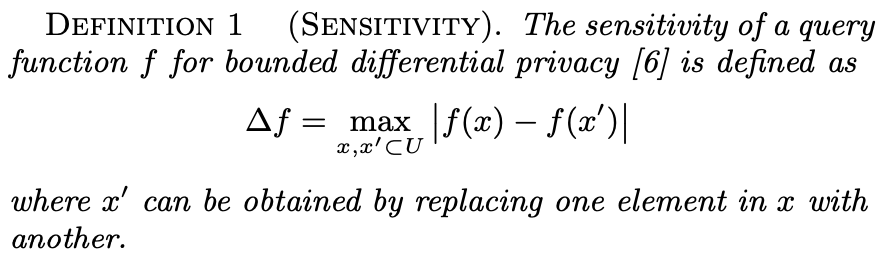

Sensitivity is one of the parameters that tunes the noise in DP. It depends on the query type f, e.g., the mean, median, or even a machine learning algorithm, and the universe of data points. The higher the sensitivity, i.e., the higher the difference an individual's data point makes in the query result, the higher the DP mechanism's noise. There are some queries whose sensitivity is lower than others, e.g., the mean's sensitivity is lower than the one from the sum, given the same universe. x and x' in this definition act as D and D'. (The author forgot to add the extra bars to represent the norm). The author of the paper uses this notion and building block of DP to define "Contribution of an individual" and "Sensitive range S(f):

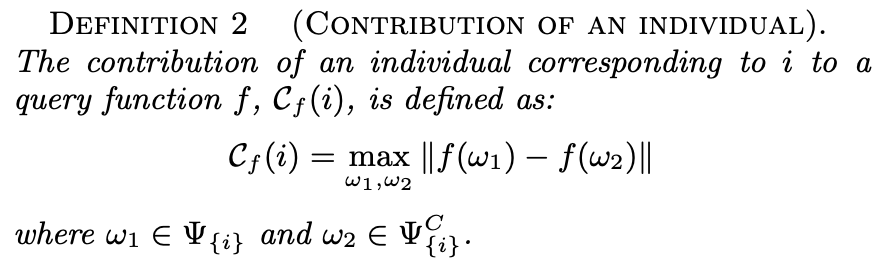

This is just like sensitivity, but it only considers the worlds where an individual is included Ψ_{i} and the worlds where such individual is not included Ψ_{i}^C. For example, an individual is in 3 worlds and is not in 2 worlds. This definition calculates f(ω) for each possible world and finds all the differences between them. In this toy example, it would yield 6 values (3x2 combinations). The maximum of these values is the contribution of an individual. 

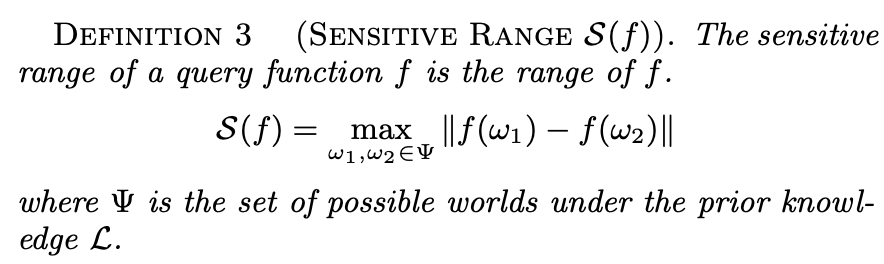

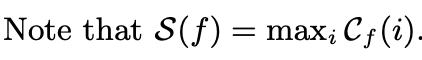

However, we need to position ourselves in the worst-case scenario. What could happen if we choose an individual whose sensitivity (Contribution of such individual) is not the largest?  
Well, then the noise would be smaller than it should be.  
What would happen then?  
The individual with the highest contribution would be unprotected if she were the one being attacked in D. This is because the result R would be too different from the other possible results R when this individual is not in the dataset. More specifically, because the standard deviation of the noise is proportional to the sensitivity, which we said was smaller than needed because we chose a smaller sensitivity, then the noise range will not cover the largest contributor's value. So if the attacker queries and obtains R and then does experiments with all the possible worlds, the attacker will have an easier time singling out which world is the correct one.  The probability of the individual being in D would be higher than in the rest of possible D's (worlds), i.e., the posterior is higher. To have a picture in mind, check Jaewo's previous [paper](https://link.springer.com/chapter/10.1007/978-3-642-24861-0_22), Figure 1.
To ameliorate this, we choose the individual with the largest contribution, which the author does with definition 3.  
This is why S(f) is the maximum value of the set of possible C_f(i).

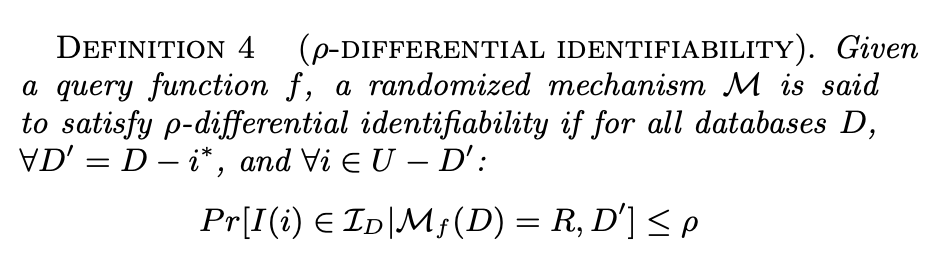

This means that in order to comply with DI with a parameter of ρ, i.e., the upper bound of the risk to identify someone in the dataset, the following must be fulfilled: 
The probability that A asserts that the identity of an individual **I(i)** is in the set of identities **I_D** of the dataset under attack **D**, given the knowledge of A about **D'** and with the output of the query **R**, is less than or equal to ρ.

Now, I am going to do my best to explain the steps of the proof:

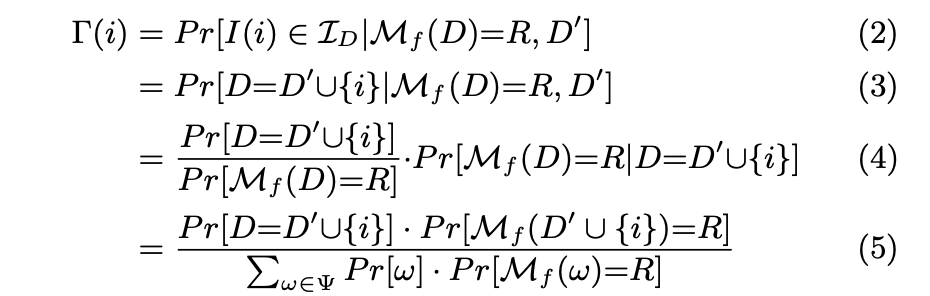

(2) Risk of disclosure = Probability that the identity being attacked I(i) belongs to the set of identities in D, given that the mechanism M executed on D yields R and that the neighboring dataset is D'.
(2) to (3)That an identity belongs to the set of identities in the dataset D (Possible world) is the same as constructing the dataset D with the known D' and the data point that belongs to an individual that is not in D'. This individual i is under attack, but it could be anyone that is not in D' (Like you :D).
(3) to (4)Applies Bayes Rule: Posterior = (Prior * Revised beliefs) / Normalization 
Prior: The author assumes that each D is equally likely - uninformative prior, i.e., without any information, the attacker's best guess is that the probability that {i} belongs to D is equally likely among possible D's (worlds).    Revised Beliefs: Probability that in a reality where D contains {i} (A possible world) we would obtain R    Normalization: M_f(ω) is a random variable that maps a sample space of possible events (Possible worlds) to a one-dimensional real space. The probability of a possible world to go to any R is 1, the probability of one world to go to a specific R is less than one, and the probability of all worlds to go to a specific R is also less than 1 (And more than the previous one).  Not all R's are equally likely, as it is a random variable that follows a Laplace distribution.    The normalization in Bayes Rule is there because we focus on the case where we obtain a particular R, which is a subset (one value) of the rest of possible R's. Therefore, to study these events with the conditions of the numerator, these events' probabilities within the studied sample space must be normalized to add up to 1 (The normalization axiom of probability theory).
The condition of given D' in Pr[D=D' U {i} | M_f(D) = R, D'] disappears because knowing D' will not affect in any way which {i} will be included in D, so it is uninformative. This may not be true, e.g., if you know the friends and family of someone in D', it is more likely that some are in D as well, but this is not considered.
(4) to (5)In the numerator, the author compresses Pr[M_f(D) = R | D=D' U {i}] into Pr[M_f(D' U {i}) = R], he does this because the attacker is already considering D  in the probability the she wants to calculate, the condition does not add new information. The denominator follows from the total probability theorem, and the author went from Pr[ω]xPr[M_f(D) = R | ω] directly to Pr[ω]xPr[M_f(ω) = R], like he did in the numerator.

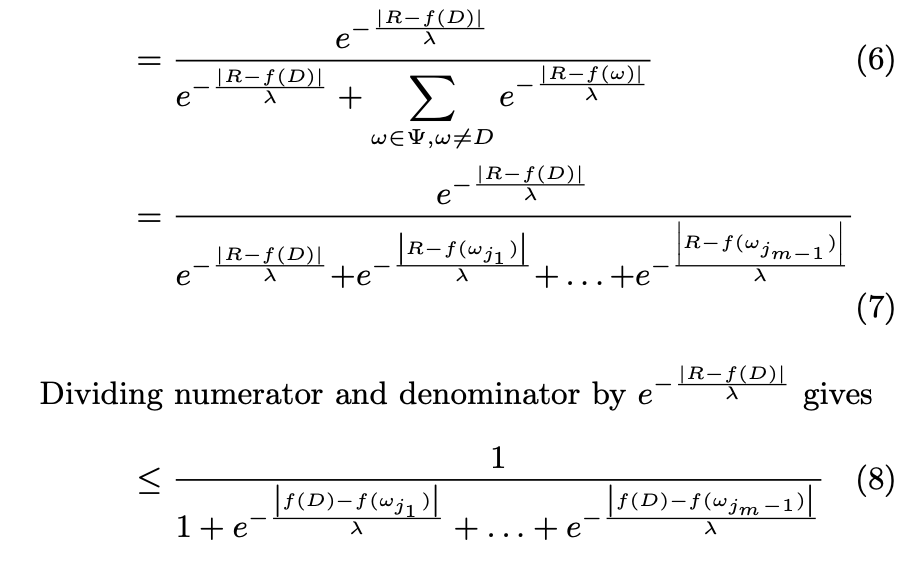

(5) to (6)  
Here the author uses the Laplace distribution, it is the substitution of **Pr[M_f(D' U {i}) = R]**, ditto for **Pr[M_f(ω) = R]**, this means *the probability that applying Mf to ω the output is R*. However, how do you go from there to the Laplace probability density function (pdf):      
            
(i) Because **M_f(.) = f(.) + Noise = R**, you may also do **Noise = R - f(.)**.   
(ii) Given the true result f(ω), i.e., we assume this is the correct world, the probability of obtaining R is the same as the probability of obtaining the Noise. So **Pr[M_f(ω) = R] = Pr[Noise]**  
(iii)  **Pr[Noise] = 1/(2λ)exp(-|Noise - μ|/λ) = 1/(2λ)exp(-|R - f(ω) - μ|/λ)**. We sample from a centered noise distribution, μ=0. The coefficient 1/(2λ) cancels out as every single component of the numerator and denominator is multiplied by it.

What happened to **Pr[D' U {i})]** and to **Pr[ω]**?  
They cancel out.  
Why?  
Because the author assumes that the prior is uniform, i.e., the probability of having **Pr[ω_i]**, like **D** in the numerator, over another **Pr[ω_j]** is the same.   
Furthermore, the author takes out from the sum in the denominator the value that is equal to the numerator. This is convenient, and visually, it conveys that we are trying to find the posterior of the world ω that is actually D, the real world. This is the only interesting posterior for the formulation of the proof, as we know there is only one world that is true, and the only one we must ensure is protected. This, of course, has no loss of generality; it could be any D. 
(6) to (7)  
The author unfolds the Sum. **m** is the number of possible worlds ω. Because we already took out the ω corresponding to D outside, the unfolding only goes until m-1.  
(7) to (8)  
As it shows in the picture, it divides the numerator and denominator by the numerator. The 1's are trivial, but what about the other expressions in the denominator? Here are the intermediate steps, I take one value in the denominator to show how it computes:

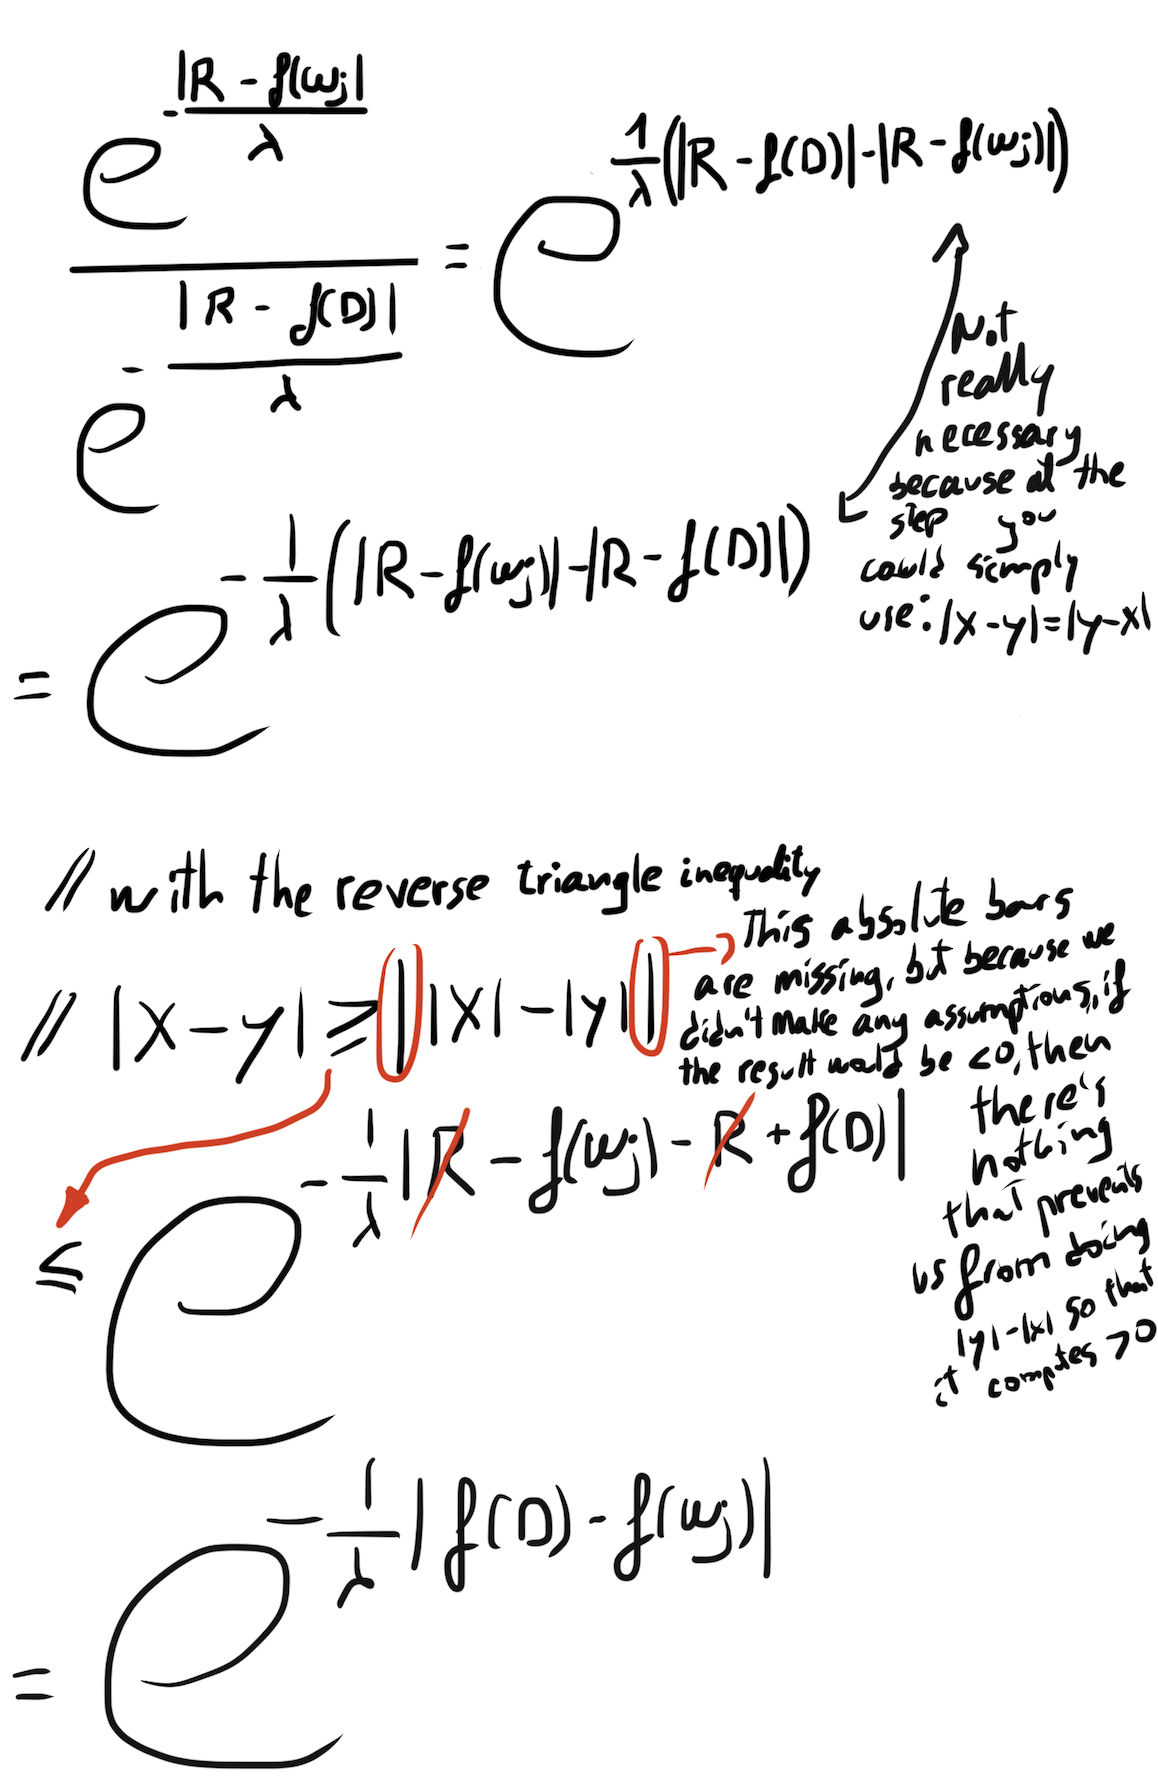

Ups, that is larger than expected...

What is next?

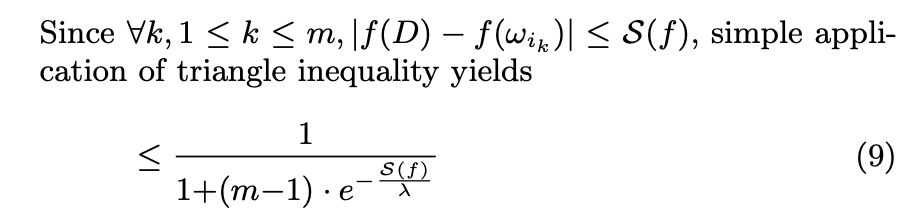

(8) to (9)We know that S(f), the sensitivity range of f(.), will contribute to an individual that yields the largest difference in outputs. Therefore, it will be larger than any other possible contribution. That is why we can make this inequality by substituting |f(D) - f(ω)| with S(f) in the exponent in all the components of the sum. Because the exponent will be larger and negative, the numerator will be smaller, making the fraction larger. It is a convenient substitution because now we have to only deal with S(f), which can be calculated theoretically. This provides an upper bound, which might not be tight.

The author trivially shows what the lower bound is. Because (m-1)*exp(-S(f)/λ) <= (m-1), then the lower bound of the expression is (1/m). In his words, "This implies that it is impossible to protect the privacy of individuals in the database with the probability less than an adversary's probability of a correct random guess." This is because m is the number of possible worlds, so you naturally cannot protect more than randomly picking a dataset with equal probability.  


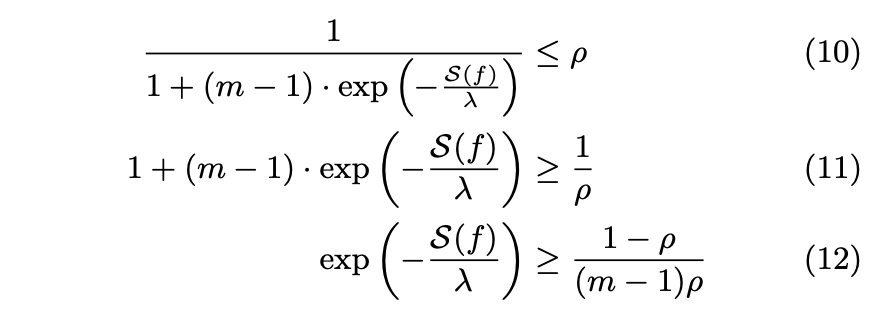

(9) to (10)In (10), the author does the algebra so that we can easily determine which value of λ fulfills this upper bound when the upper bound is set to ρ. Expression 9 is the disclosure risk, and it has to be smaller than ρ (shown in (10)).  
(10) to (12)  
In essence, arithmetic to get closer to find the expression for λ.

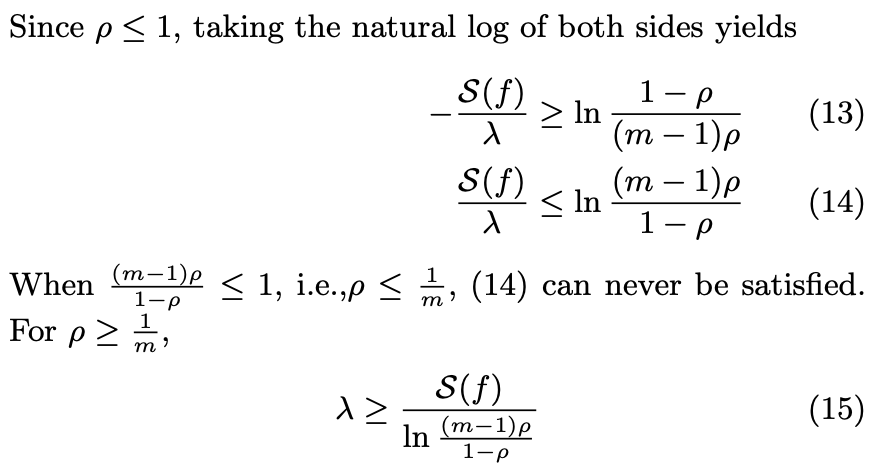

(12) to (15)Arithmetic to find the lower bound of λ.The comment between (14) and (15) is because if ρ = 1/m, then the natural log of the expression (ln[(m-1)ρ /(1-ρ )]) is zero or negative, which cannot be, given that S(f)/λ will always be larger than 0. This also makes sense because 1/m is the lower bound previously defined; 1/m is the random guess from the attacker, so, as we said before, you cannot get lower than that.

On another note: Referring to what I mentioned before, the possible worlds' priors might be different (If someone is in D', her friends or family are more likely to be in D). in case a prior is higher than ρ, then privacy is violated inherently. I.e., if Pr[D = D′ ∪ {i}] > ρ, then the attacker already guesses with a probability of being correct higher than the upper bound we would like to impose.The author then says that for less severe cases, i.e., the prior is different between possible worlds but with less ρ, one can substitute m = 1 / max Pr[D = D′ ∪ {i}] in Ψ. What I understand with this is that for example, if you have 9 worlds whose probability is equally likely and equal to 8.88...%, and one world that is likely with probability 20% (In total 10 worlds), to make things easier, this is equivalent to say that you have 5 options (1/0.2) from which to pick, each of the five options is equally likely, and the probability is equal to the worst-case scenario when you had 10 options. This is an elegant way to keep the proof simple, even for non-uniform priors. Beautiful :) And avoids an attack by the reviewer :D

Finally, he makes a connection to DP because all along, ε was hidden λ = S(f)/ ε. Surprise!In the beginning, we mentioned that DP adds random noise to deterministic results from a query and that this noise's standard deviation is proportional to the sensitivity, and there it is. The tails of the Laplacian will become longer the larger S(f). Furthermore, we can have an impact on the tails by manually selecting ε. The smaller it is, the longer these tails and the more noise is added, as more possibilities become relatively more likely. And how do we do this? Well, this is what the paper is about, we define the risk ρ, and from there, we get ε.

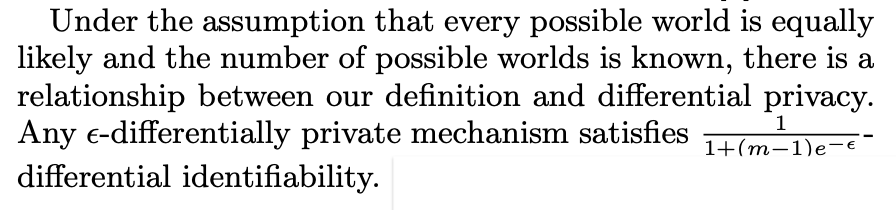

Let me show this and then we get on with the code!

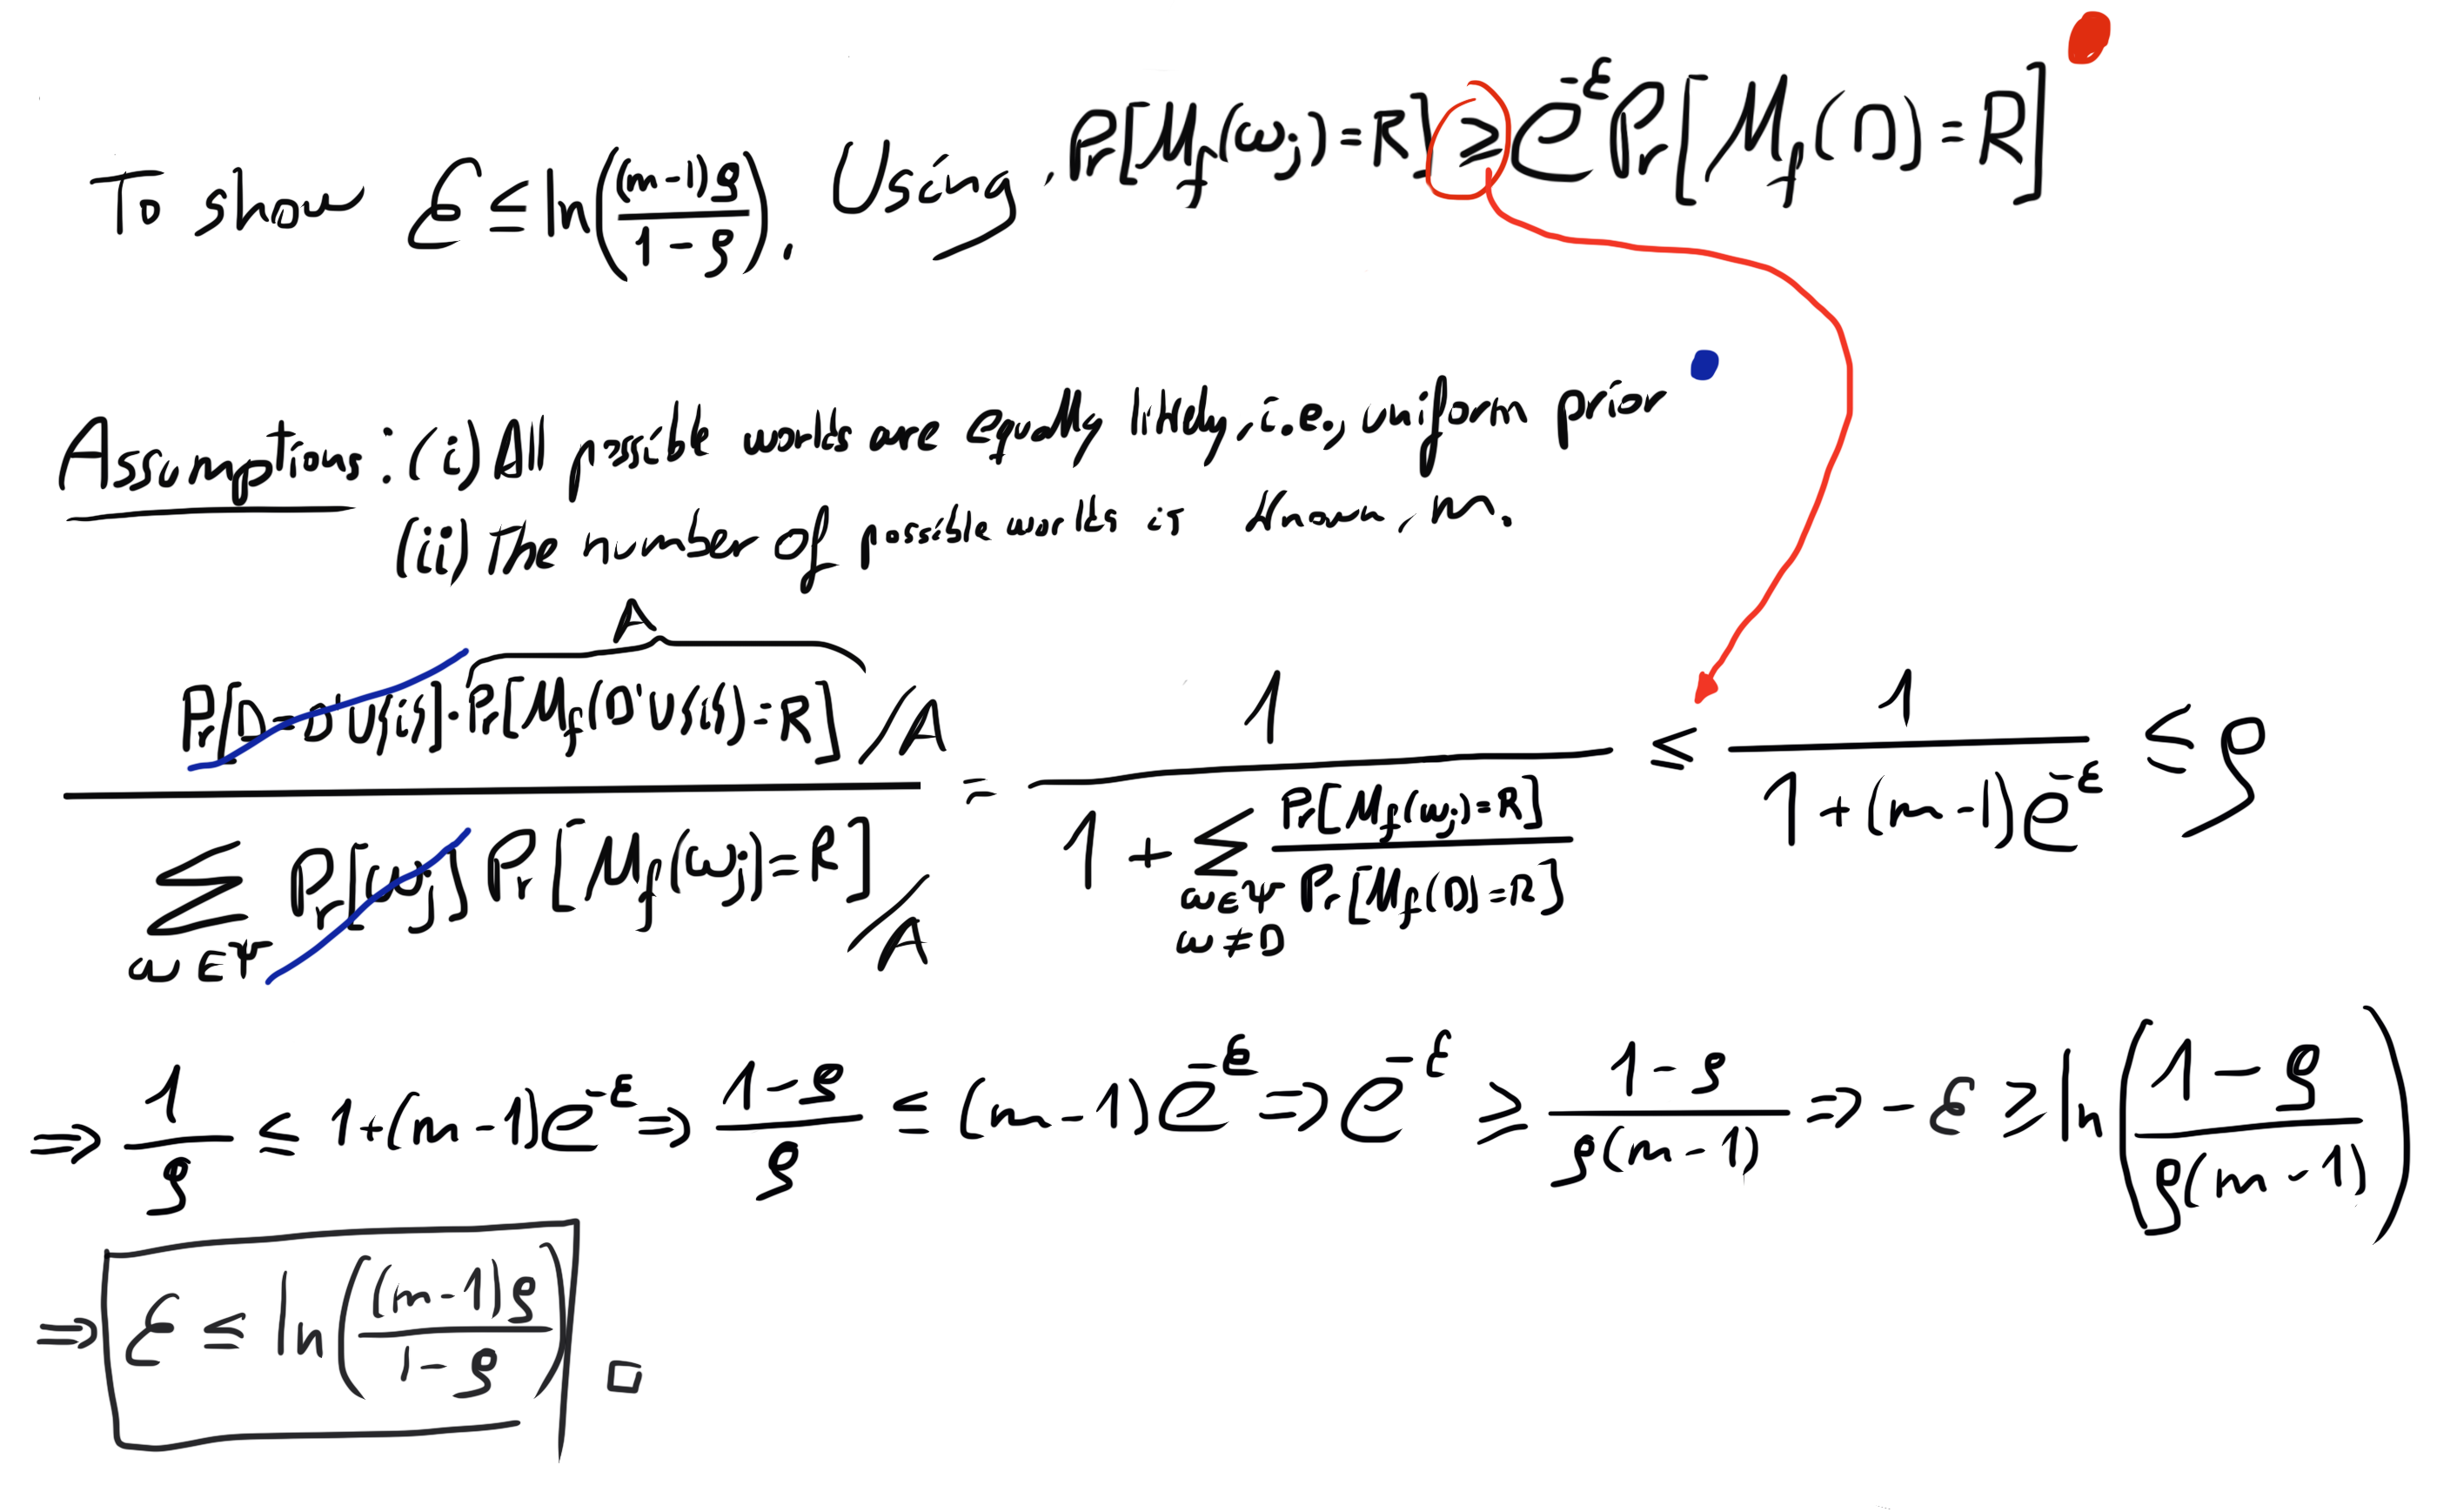

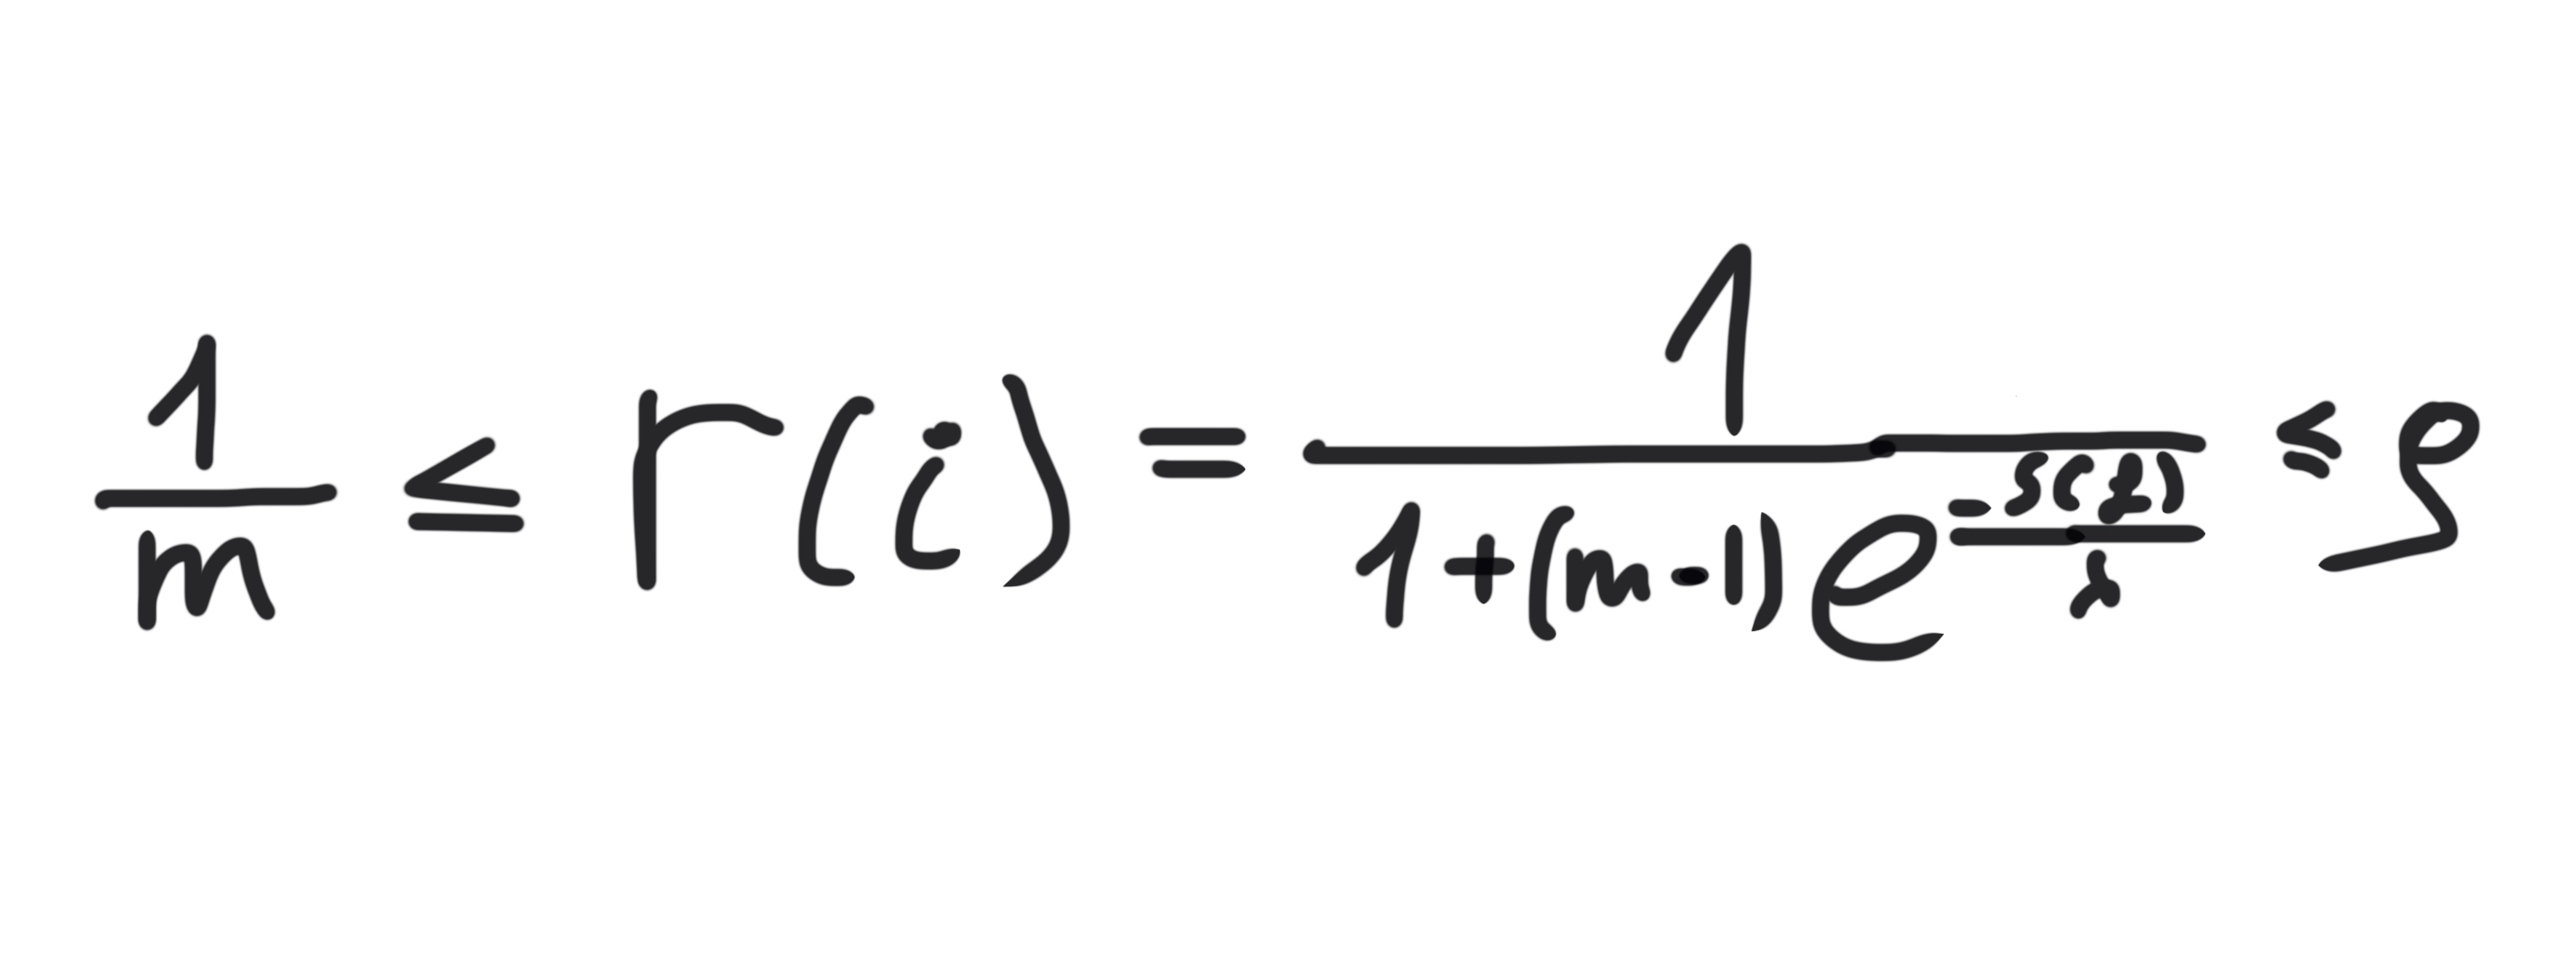

These are the lower and upper bonds of the disclosure risk.

# Code

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import make_interp_spline, BSpline
# For reproducibility
random.seed(42)

## Datasets

Toy example of section 4 of the paper

In [2]:
w_1 = [1, 2, 3]
w_2 = [1, 3, 4]
w_3 = [1, 3, 5]
w_4 = [1, 3, 6]
w_5 = [1, 3, 7]
w_6 = [1, 3, 8]
w_7 = [1, 3, 9]
w_8 = [1, 3, 10]
worlds = [w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8]

Adult Data Set for section 5 of the paper

In [3]:
df = pd.read_csv("adult.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In the paper, the author only uses numerical values: as age, education-num, capital-gain, capital-loss, hours-per-week.  
Therefore, we will filter only these attributes.

In [5]:
census_df =  df.filter(['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)
census_df.head(5)

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


## Helper functions

In this [blog post](https://github.com/gonzalo-munillag/Blog/tree/main/My_implementations/Global_sensitivity) I made the functions to calculate empirically the sensitivites of queries based on the datasets from scratch, this time however I will use theoretical formulations.

In [6]:
def mean_sensitive_range(deterministic_query_outputs):
    
    return np.abs(np.max(deterministic_query_outputs) - np.min(deterministic_query_outputs)) / len(deterministic_query_outputs)

In [7]:
def calculate_λ(sensitive_range, m, ρ):
    
    return sensitive_range / (np.log((m-1)*ρ/(1-ρ)))

In [8]:
def calculate_ε_i(sensitive_range, m, ρ):
    """
    Description:
    It calculates ε based on the calculation of λ and the sensitive range, m, ρ
    """
    
    return sensitive_range / calculate_λ(sensitive_range, m, ρ)

In [9]:
def calculate_ε_ii(m, ρ):
    """
    Description:
    It calculates ε based only based on m, ρ
    """  
    return np.log(((m-1)*ρ)/(1-ρ))

In [10]:
def laplace_noise(Response, deterministic_query_outputs, λ):

    return np.exp(-np.abs(Response - deterministic_query_outputs)/λ)

In [11]:
def noise_ratio(Noise, U_range):
    
    return Noise/U_range

In [12]:
def ε_binary_search(ρ_target, w, worlds, R, sensitive_range, query):
    """
    INPUT
        ρ_target - this is the disclosure risk we are willing to accept
        w - the world that provides the worst-case scenario
        worlds - the different worlds that could be the real dataset
        R - The random response of the query, it should also be the worst-case scenario
        sensitive_range - this is the range of values that the deterministic output of the query can make based on the possible worlds
        query - the query we are dealing with, it could be mean, median,... 
    OUTPUT
        ε - the closest ε we can get to comply with ρ_target with an error of 0.01%
    Description
        Executes binary search to find ε based on a ρ_target - risk disclosure target; this way, we can find the best utility for reasonable privacy. To simplify things, 
        we perform a binary search with λ instead. And then calculate ε from λ
    """
        
    m = len(worlds)
    λ_high = calculate_λ(sensitive_range, m, ρ_target)
    λ_low = 0
    λ = (λ_high + λ_low)/2
    ρ = calculate_disclosure_risk(w, worlds, R, λ, np.mean)
        
    while np.abs(ρ_target - ρ) > 0.0001:
        
        if ρ_target < ρ:
            
            λ_low = λ
        
        if ρ_target > ρ:
            
            λ_high = λ    
            
        λ = (λ_high + λ_low)/2
        ρ = calculate_disclosure_risk(w, worlds, R, λ, np.mean)
        
    ε = sensitive_range/λ
    return ε

## Main functions

In [13]:
def calculate_disclosure_risk(attacked_world, worlds, R, λ, query):
    
    numerator = laplace_noise(R, query(attacked_world), λ)
    denominator = 0
    for world in worlds:
        
        denominator += laplace_noise(R, query(world), λ)
            
    return numerator / denominator

## Main

### Section 4

We are going to compute the non-trivial results and the plots. The first numbers that come out are in point 4. We the author is showing is how for some functions the bound is not tight.

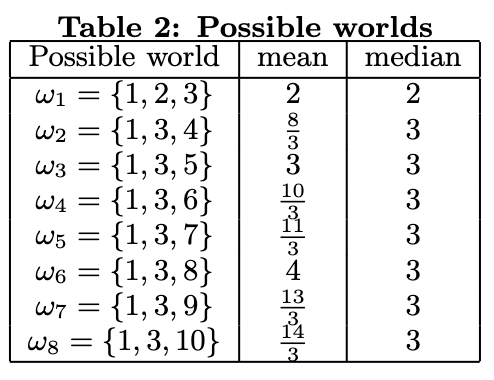

In this table we can see the possible worlds for a U = {1, 2, 3, ..., 10} where D = {1, 2, 3}. ω_1 is the real world, but the adversary only knows D', in the paper the auhtor picks D'={1, 3}. So the number of worlds it can make is **(|U| - |D'| choose |D| - |D'|) = (10 - 2 choose 3 - 1) = 8**.  
The adversary will try out all these worlds by querying the dataset once and obtaining R, the query used in this example is the mean and the median.  
As we have discussed, we have to position ourselves on the worst-case scenario; therefore, we have to find the max(C_f(i)) so that we can use it for the sensitive range of f, S(f).  
We see that the mean values for the 1st and 8th world will yield the maxiumnum C(f), i.e., it will be our S(f):
    
    S(f_mean) = |f(ω_1) - f(ω_8)| = |14/3 - 2| = 2.66...
    
For the median: 

    S(f_median) = |f(ω_1) - f(ω_2)| = |f(ω_1) - f(ω_3)| = ... = |2 - 3| = 1
    


In [14]:
# number_worlds
m = 8

In [15]:
mean_sensitive_range = np.abs((np.mean([1, 2, 3]) - np.mean([1, 3, 10])))
mean_sensitive_range

2.666666666666667

In [16]:
median_sensitive_range = np.abs((np.median([1, 2, 3]) - np.median([1, 3, 10])))
median_sensitive_range

1.0

The author sets the identifiability risk to ρ = 1/3, i.e., the probability of identifying an individual in the dataset is less than 33.33...%.

In [17]:
ρ = 1/3

Now we calculate λ:

In [18]:
λ = calculate_λ(mean_sensitive_range, m, ρ)
λ

2.128628267061142

In the paper λ = 8 / (3* ln(7/2)) = 2.128...

Now he calculates the disclosure risk. Positioning himself in the worst-case scenario, he chooses the response R equal to the response the real dataset would have, in the case, D = ω_1: f(D) + Noise = 2 = R. This maximizes the posterior that the real world is D, in the words of the author: it maximizes the distance between the expectation that D = ω_1 and other possible worlds.
With this in mind, the disclosure risk for world 1, i.e., the disclosure risk of the person whose data point is 2 (Do not confuse this 2 with the R), is:

In [19]:
# Response 
R = 2

##### The paper's output is 0.2294

In [20]:
calculate_disclosure_risk(w_1, worlds, R, λ, np.mean)

0.22943826951692214

0.2294... is lower than 1/3, therefore, we could use some less noise in the mechanism M_f.

Let us plot the max disclosure risk as a function of ρ. **This corresponds to Figure 1 (a) of the paper**

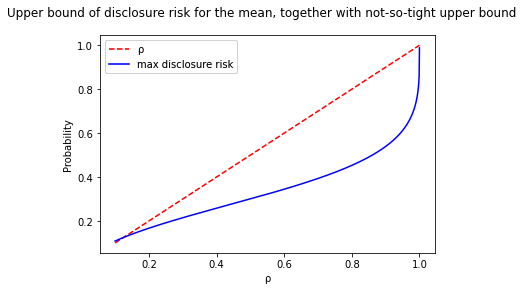

In [21]:
x = np.arange(0.1, 1.001, 0.001)
y = []
for ρ in np.arange(0.1, 1, 0.001):
  
    λ = calculate_λ(mean_sensitive_range, m, ρ)
    y.append(calculate_disclosure_risk(w_1, worlds, R, λ, np.mean))

# If we use ρ= 1 then we get a division by 0, so:
λ = calculate_λ(mean_sensitive_range, m, 0.9999999)
y.append(calculate_disclosure_risk(w_1, worlds, R, λ, np.mean))

# And here we do some smoothing with our friend the spline with third degree polynomials
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x)

upper_bound, = plt.plot(x, x, 'r--',  label="ρ")
tight_bound_attempt, = plt.plot(x, y_smooth, 'b',  label="max disclosure risk") 

# Meta 
legend = plt.legend(handles=[upper_bound, tight_bound_attempt], loc='upper left')
ax = plt.gca().add_artist(legend)

plt.suptitle('Upper bound of disclosure risk for the mean, together with not-so-tight upper bound')
plt.ylabel('Probability')
plt.xlabel('ρ')
plt.show()

This shows that the bound is not tight, and one could use less noise. 
But how would this work? ρ is set, and from there, we calculate λ. We found a lower bound for λ, which translates into an upper bound for ε. So how could ε be higher and λ lower? This is because this "tight" upper bound is not as tight as it could get; the formulation has made many approximations and has become too conservative.
Let us go further than the paper here for a second and find a tighter value of epsilon that allows for appropriate risk with less noise.  

The first thing I will do is check which epsilon was being used to get the blue curve (In different ways):

In [22]:
# We redefine the variables, they have been altered by the prebvious plotting cell
m = 8
ρ = 1/3
λ = calculate_λ(mean_sensitive_range, m, ρ)
mean_sensitive_range = np.abs((np.mean([1, 2, 3]) - np.mean([1, 3, 10])))
ε = calculate_ε_i(mean_sensitive_range, m, ρ) 
ε

1.2527629684953678

In [23]:
# this is a simpler function to calculate ε
ε = calculate_ε_ii(m, ρ) 
ε

1.2527629684953678

In [24]:
# And this is yet anbother way
ε = mean_sensitive_range / λ
ε

1.2527629684953678

In [25]:
# Checking that we calculated ε appropriately (We indeed got the same result s before the plot)
λ = mean_sensitive_range / ε 
disclosure_risk = calculate_disclosure_risk(w_1, worlds, R, λ, np.mean)
print("Disclosure risk:", disclosure_risk)

Disclosure risk: 0.22943826951692214


This ε is resonable, given the recommendations in literature to keep ε between 0.1 and 1. Now, let us see how much higher we can make ε and stil comply. We could do a binary search here

In [26]:
# Manually (running the cell multiple times and decreasing or incresing ε)
ε = 2.24
R = 2
λ = mean_sensitive_range / ε 
disclosure_risk = calculate_disclosure_risk(w_1, worlds, R, λ, np.mean)
print("Manual search ε =", ε)
print("Disclosure risk =", disclosure_risk)

Manual search ε = 2.24
Disclosure risk = 0.3322825178728668


In [27]:
# Good old binary search
ρ = 1/3
ε = ε_binary_search(ρ, w_1, worlds, R, mean_sensitive_range, np.mean)
print("Binary search ε =", ε)
λ = mean_sensitive_range / ε 
disclosure_risk = calculate_disclosure_risk(w_1, worlds, R, λ, np.mean)
print("Disclosure risk =", disclosure_risk)

Binary search ε = 2.249591021024562
Disclosure risk = 0.3333327228610728


If you still have the question: "But how is this possible? We had set an upper bound for epsilon, and nonetheless, we still could make it higher without much trouble!" 
This is a limitation of the paper's formulation; the upper bound is not tight as it was explained.

Now I will plot the same as before, but now I am going to perform a binary search at each ρ. You will see that the blue curve is now tight. (Again, this is for the worst-case scenario where R is 2 from ω_1 because it is the response of the world that yields the most significant difference with respect to the rest)

<ipython-input-10-d993ecbea433>:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-np.abs(Response - deterministic_query_outputs)/λ)
<ipython-input-10-d993ecbea433>:3: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-np.abs(Response - deterministic_query_outputs)/λ)
<ipython-input-10-d993ecbea433>:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-np.abs(Response - deterministic_query_outputs)/λ)
<ipython-input-10-d993ecbea433>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-np.abs(Response - deterministic_query_outputs)/λ)
<ipython-input-12-8bc22826a84c>:36: RuntimeWarning: divide by zero encountered in double_scalars
  ε = sensitive_range/λ


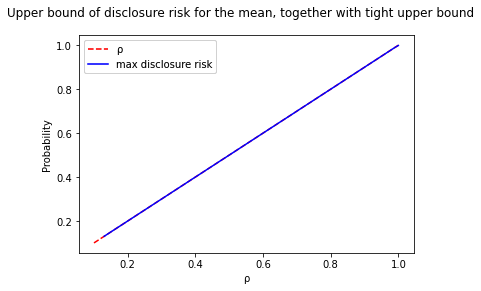

In [28]:
R = 2
mean_sensitive_range = np.abs((np.mean([1, 2, 3]) - np.mean([1, 3, 10])))
x = np.arange(0.1, 1.01, 0.01)
y = []
ε_list = []
for ρ in np.arange(0.1, 1, 0.01):
      
    ε = ε_binary_search(ρ, w_1, worlds, R, mean_sensitive_range, np.mean)
    ε_list.append(ε)
    λ = mean_sensitive_range/ε
    y.append(calculate_disclosure_risk(w_1, worlds, R, λ, np.mean))

# If we use ρ= 1 then we get a division by 0, so ρ will be close but not quite, 0.9999999
ρ = 0.999
ε = ε_binary_search(ρ, w_1, worlds, R, mean_sensitive_range, np.mean)
λ = mean_sensitive_range/ε
y.append(calculate_disclosure_risk(w_1, worlds, R, λ, np.mean))

upper_bound, = plt.plot(x, x, 'r--',  label="ρ")
tight_bound_attempt, = plt.plot(x, y, 'b',  label="max disclosure risk") 

# Meta 
legend = plt.legend(handles=[upper_bound, tight_bound_attempt], loc='upper left')
ax = plt.gca().add_artist(legend)

plt.suptitle('Upper bound of disclosure risk for the mean, together with tight upper bound')
plt.ylabel('Probability')
plt.xlabel('ρ')
plt.show()

Voilà! You can see that there are some warnings, this is because there are values of ε that are -inf, due to the "infinity" need of privacy when the disclosure rirsk is so low. See the array:

In [29]:
for ε in ε_list:
    print(ε, end=' ')

-inf -inf -inf 0.07192222057962604 0.21163776391625563 0.34455495527901203 0.4720936573567683 0.595047862197564 0.7117672548862751 0.8270383923688898 0.9394206013866765 1.0475920394319533 1.1551735096872537 1.2588355296098628 1.3605832067935242 1.4606616313745724 1.5592896651870867 1.656664074294423 1.7529629148369383 1.8483483306674964 1.9412924652219914 2.035194847038745 2.126741580138026 2.219668114392235 2.310287975381758 2.4005580268987052 2.4916806182892017 2.5815817661264315 2.6726068277890422 2.7624919556362335 2.8524696599093664 2.9412826988259546 3.031631626001415 3.1223021765282066 3.213367779939525 3.3033737531966683 3.3953966925824632 3.4880302561685963 3.5796688711474256 3.671959604869637 3.7667523490220027 3.8606121599944334 3.957225990062645 4.052949747047726 4.151689829277428 4.24958682413897 4.350775986038141 4.451175751073193 4.555160679039223 4.65841957437102 4.765577958110638 4.872086886499709 4.982835914803187 5.093029623502024 5.207836363114245 5.324902467391002 

It is interesting to see that in this case that a value of ε of around 19 will provide 0 uncertainty to an attacker. Does this mean everyone should not go beyonf this value? No, the problem is that while we have set epsilon based on disclosure risk, the underlying data will make this list of ε different, and perhaps ε=ε might be okay.  
Now let us continue with the rest of the paper.

While for the mean the upper bound was not too tight, for other functions it might be, as it is the case of the median as the author shows.  
Looking at the table with the worlds and the values for median, we see that most of these worlds yield the same result. The sensitive range, i.e., the interval of values the query could output, is 1, and it is 1 if you compare the true world with any other of the other 7 worlds, this was not the case for the mean. This fact, looking at equation (8), means that evry single exponent is the same, so from (8) to (9) there is not an inequality, but an equality. Therefore, the bounds that we obtain for ε are the tightest, and for the median with this dataset we will obtain the best ε with the formulation. Therefore, we obtain the amount of noise actually required.  
To show this, let us make a plot just like in the first plot (Without binary search) and we will see that the bound overlaps perfectly.  
Again, a R=2 from ω_1 will yield the largest difference.

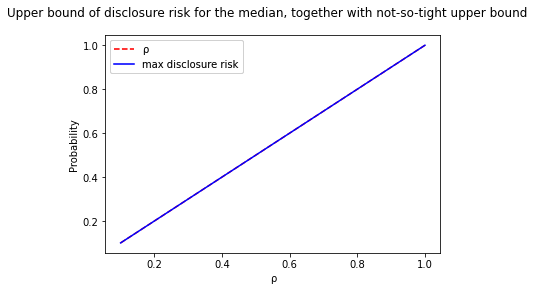

In [30]:
R = 2
m = len(worlds)
median_sensitive_range = np.abs((np.median([1, 2, 3]) - np.median([1, 3, 10])))
x = np.arange(0.1, 1.001, 0.001)
y = []
for ρ in np.arange(0.1, 1, 0.001):
  
    λ = calculate_λ(median_sensitive_range, m, ρ)
    y.append(calculate_disclosure_risk(w_1, worlds, R, λ, np.median))

# If we use ρ= 1 then we get a division by 0, so:
λ = calculate_λ(median_sensitive_range, m, 0.9999999)
y.append(calculate_disclosure_risk(w_1, worlds, R, λ, np.median))

# And here we do some smoothing with our friend the spline with third degree polynomials
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x)

upper_bound, = plt.plot(x, x, 'r--',  label="ρ")
tight_bound_attempt, = plt.plot(x, y_smooth, 'b',  label="max disclosure risk") 

# Meta 
legend = plt.legend(handles=[upper_bound, tight_bound_attempt], loc='upper left')
ax = plt.gca().add_artist(legend)

plt.suptitle('Upper bound of disclosure risk for the median, together with not-so-tight upper bound')
plt.ylabel('Probability')
plt.xlabel('ρ')
plt.show()

The author then goes on to eyplain that for any f there exists a set of contions (worlds) that would make the equations an equality and this get the nice bounds. Given that the real world is messy, I do not think this would happen often.  



### Section 5

Now the author jumps to **Section 5**, where he drops differential identifiability in a real setting.
He uses the [Adult Database from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult), which I stored in a dataframe in Section Datasets.
You may see in this table from the paper the max and min of these attributes, I will do the same to loosely make sure we are using the same data.

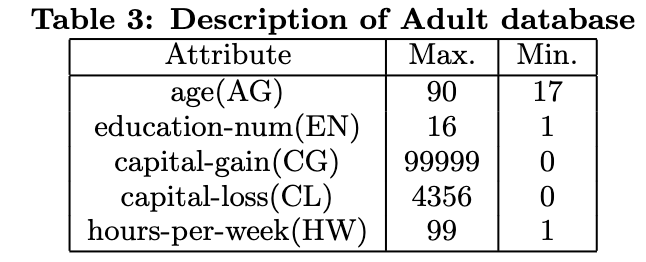

In [31]:
census_df.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [32]:
print("Age")
print("Max:", np.max(census_df['age']))
print("Min:", np.min(census_df['age']))
print("educational-num")
print("Max:", np.max(census_df['educational-num']))
print("Min:", np.min(census_df['educational-num']))
print("capital-gain")
print("Max:", np.max(census_df['capital-gain']))
print("Min:", np.min(census_df['capital-gain']))
print("capital-loss")
print("Max:", np.max(census_df['capital-loss']))
print("Min:", np.min(census_df['capital-loss']))
print("hours-per-week")
print("Max:", np.max(census_df['hours-per-week']))
print("Min:", np.min(census_df['hours-per-week']))

Age
Max: 90
Min: 17
educational-num
Max: 16
Min: 1
capital-gain
Max: 99999
Min: 0
capital-loss
Max: 4356
Min: 0
hours-per-week
Max: 99
Min: 1


Looks good.

In [33]:
census_df.shape

(48842, 5)

The amount of data points is also correct; let us proceed.

The author assumes the universe is all the people in the US, fair enough. For the first examples, he is focusing on the hours-per-week attribute.  
For the small example at the beginning, I will do the same, that is, our database. 

However, let us take a step back for a moment. The dataset has 48842 individuals, while [the USA's population in 1994 was 263,126,000 people](https://en.wikipedia.org/wiki/Demographics_of_the_United_States). Does this mean there are (263,126,000 - 48841 choose 48842 - 48841)=263077159 possible worlds? Yes; however, the values repeat themselves ([Pidgeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle)), and therefore, in the case of hours-per-week, there can only be 99 possible worlds. It is as if there were only 99 more people in the universe than in the dataset held by the attacker, D'. Therefore, the guarantees we are about to get are very conservative, as thousands of people also work, e.g., 50 hours per week. This is an observation I consider in these two previous blogs: [(i)](https://github.com/gonzalo-munillag/Blog/tree/main/My_implementations/Global_sensitivity) and [(ii)](https://github.com/gonzalo-munillag/Blog/tree/main/My_implementations/Local_sensitivity); where I implement the calculation of sensitivities from scratch and one must consider that a universe is a multiset, not a set.   
So, in this setting, we are only guessing whether an individual the adversary is attacking is working a psecific amount of hours.

Alright, let us continue.
So first, we must get the sensitive range of the hours-per-week attribute. We are still using the mean query.
The worlds that would yield the largest difference would be ω_1 and ω_99. Even though the author does not specify which D' he uses to construct the worlds, **ω_j = D' U {hours-per-week}**, you do not need to. You only need to make sure you use ω_1 and ω_99, which would yield the largest difference:
S(f_mean) = |f(ω_1) - f(ω_99)| = |f(D' U {1}) - f(D' U {99})| = | (sum(D')+1)/48842 - (sum(D')+99)/48842| = | (1-99)/48842| = 98/48842 = 0.00201  
As you can see, the sums of the values in D' cancel out.  

Once we have this, he poses the case where ρ is 10%. Let us calculate which λ we would get: **In the paper is around 8.4032e-4**

In [34]:
m = 99
ρ = 0.1
mean_sensitive_range = 98/48842
λ = calculate_λ(mean_sensitive_range, m, ρ)
λ

0.0008403207231434116

Now the author creates a table, see below, with a bunch of experiments. He has a typo on the paper; he meant the standard deviation as per the table, not the median. Also he has a typo on the paper, he says he tests 3 attributes but he tested the 5. (This is just to show how I look into detail hehe)
So, what he did was to study the mean and median for each of the 5 attributes. It calculated the sensitive range of the mean for each attribute and the deterministic result of the query (mean and median) over each attribute. It then computed λ and produced 3 random responses (Independent of each other, otherwise we would need to use the composition theorem to keep each response equally private). He did this for two values of risk disclosure, 0.1 and 0.001.
When λ is inf, that means that the noise distribution is uniform (It has lost the Laplacian shape centered around the true value), and, therefore, the outputs hold no information about the data.   

And yes, I have a quest, I must reproduce this table too! However, the responses R will not be the same, while he and I sample form the same distribution, the sampling is still random.

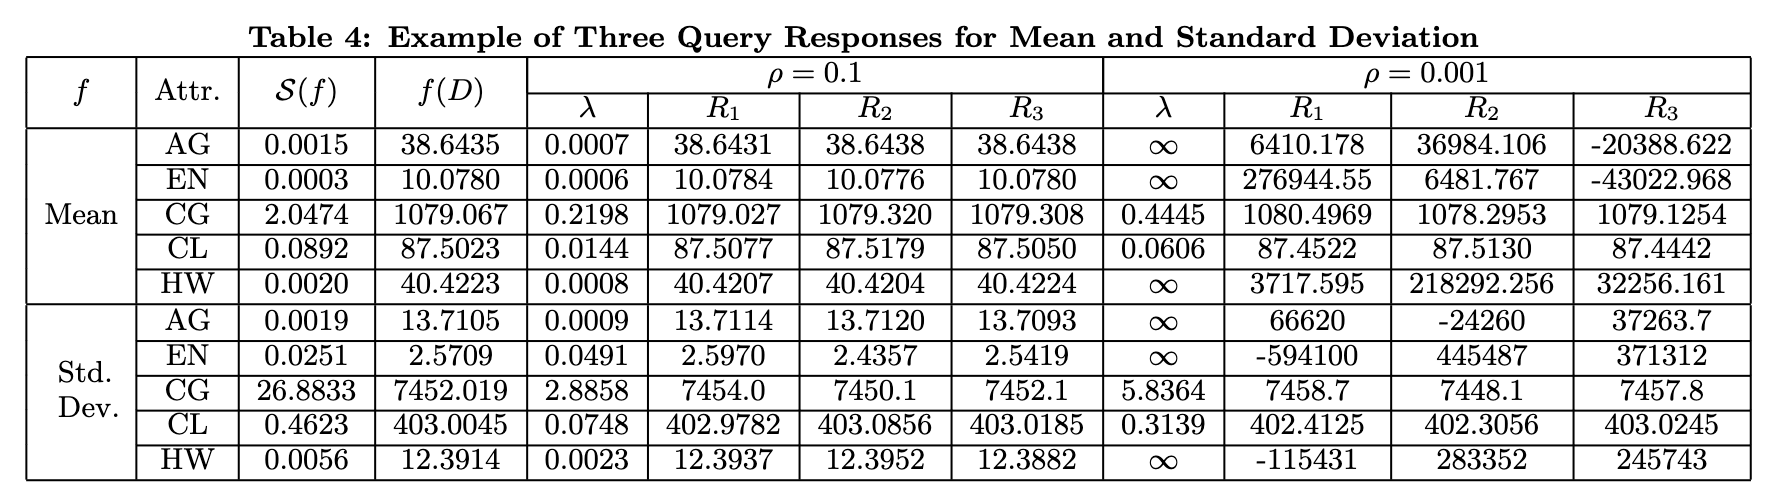

In [35]:
census_df.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

##### Mean

In [36]:
# Sensitive range. For this we use the theoretical upper bound of the sensitivity for the mean: S(f_mean) = |max(Dataset) - min(Dataset)|/len(Datset)
# https://github.com/opendp/smartnoise-core/tree/develop/whitepapers/sensitivities
AG_sensitivity_range_mean = round(np.abs(np.max(census_df['age']) - np.min(census_df['age']))/census_df.shape[0],4)
EN_sensitivity_range_mean = round(np.abs(np.max(census_df['educational-num']) - np.min(census_df['educational-num']))/census_df.shape[0],4)
CG_sensitivity_range_mean = round(np.abs(np.max(census_df['capital-gain']) - np.min(census_df['capital-gain']))/census_df.shape[0],4)
CL_sensitivity_range_mean = round(np.abs(np.max(census_df['capital-loss']) - np.min(census_df['capital-loss']))/census_df.shape[0],4)
HW_sensitivity_range_mean = round(np.abs(np.max(census_df['hours-per-week']) - np.min(census_df['hours-per-week']))/census_df.shape[0],4)

print("Sensitive range of mean over different attribute values, same order as in paper")
print(AG_sensitivity_range_mean)
print(EN_sensitivity_range_mean)
print(CG_sensitivity_range_mean)
print(CL_sensitivity_range_mean)
print(HW_sensitivity_range_mean)

# Determinisitc query output
AG_mean = round(np.mean(census_df['age']),4)
EN_mean = round(np.mean(census_df['educational-num']),4)
CG_mean = round(np.mean(census_df['capital-gain']),4)
CL_mean = round(np.mean(census_df['capital-loss']),4)
HW_mean = round(np.mean(census_df['hours-per-week']),4)

print("Deterministic mean values, same order as in paper")
print(AG_mean)
print(EN_mean)
print(CG_mean)
print(CL_mean)
print(HW_mean)

Sensitive range of mean over different attribute values, same order as in paper
0.0015
0.0003
2.0474
0.0892
0.002
Deterministic mean values, same order as in paper
38.6436
10.0781
1079.0676
87.5023
40.4224


All restuls are equal

In [37]:
# Calculating λ
ρ_list = [0.1, 0.001]

for ρ in ρ_list: 
    
    print("ρ = %s" % ρ)
    
    # The number of worlds depends on the attribute, the number of potential uniques
    m = np.abs(np.max(census_df['age']) - np.min(census_df['age']))
    AG_λ = round(calculate_λ(AG_sensitivity_range_mean, m, ρ), 4)
    print("AG λ =", AG_λ)
    for i in range(0,3):   
        r_unif = random.uniform(0, 1)
        # The inverse of the Laplace CDF, this is a trick to sample from the laplace distribution using uniform noise
        r_lap = AG_λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
        print("R%s = %s" %(i, round(AG_mean + r_lap, 4)))

    m = np.abs(np.max(census_df['educational-num']) - np.min(census_df['educational-num']))
    EN_λ = round(calculate_λ(EN_sensitivity_range_mean, m, ρ), 4)
    print("EN λ =", EN_λ)
    for i in range(0,3):   
        r_unif = random.uniform(0, 1)
        r_lap = EN_λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
        print("R%s = %s" %(i, round(EN_mean + r_lap, 4)))

    m = np.abs(np.max(census_df['capital-gain']) - np.min(census_df['capital-gain']))
    CG_λ = round(calculate_λ(CG_sensitivity_range_mean, m, ρ), 4)
    print("CG λ =", CG_λ)
    for i in range(0,3):   
        r_unif = random.uniform(0, 1)
        r_lap = CG_λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
        print("R%s = %s" %(i, round(CG_mean + r_lap, 4)))

    m = np.abs(np.max(census_df['capital-loss']) - np.min(census_df['capital-loss']))
    CL_λ = round(calculate_λ(CL_sensitivity_range_mean, m, ρ), 4)
    print("CL λ =", CL_λ)
    for i in range(0,3):   
        r_unif = random.uniform(0, 1)
        r_lap = CL_λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
        print("R%s = %s" %(i, round(CL_mean + r_lap, 4)))

    m = np.abs(np.max(census_df['hours-per-week']) - np.min(census_df['hours-per-week']))
    HW_λ = round(calculate_λ(HW_sensitivity_range_mean, m, ρ), 4)
    print("CL λ =", HW_λ)
    for i in range(0,3):   
        r_unif = random.uniform(0, 1)
        r_lap = HW_λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
        print("R%s = %s" %(i, round(HW_mean + r_lap, 4)))
    
    print("\n")


ρ = 0.1
AG λ = 0.0007
R0 = 38.6434
R1 = 38.6457
R2 = 38.644
EN λ = 0.0007
R0 = 10.0787
R1 = 10.0777
R2 = 10.0778
CG λ = 0.2198
R0 = 1078.7304
R1 = 1079.4521
R2 = 1079.1049
CL λ = 0.0144
R0 = 87.5429
R1 = 87.5142
R2 = 87.5021
CL λ = 0.0008
R0 = 40.4247
R1 = 40.4231
R2 = 40.4221


ρ = 0.001
AG λ = -0.0006
R0 = 38.6437
R1 = 38.6431
R2 = 38.6437
EN λ = -0.0001
R0 = 10.0782
R1 = 10.0777
R2 = 10.0782
CG λ = 0.4445
R0 = 1078.8433
R1 = 1079.2387
R2 = 1079.5868
CL λ = 0.0606
R0 = 87.3533
R1 = 87.5263
R2 = 87.6044
CL λ = -0.0009
R0 = 40.4209
R1 = 40.4235
R2 = 40.4226




All results are equal (and more or less equal for the random ones), except for lambda's negative values. Those coincide with the inf in the table. Coincidentally, in these cases ρ < 1/m, that is impossible to ask for. 1/m is the minimum identifiability risk; it represents an attacker choosing randomly between m options; a mechanism offering this type of protection destroys all utility. In the paper's case, the author resorts to just sampling from a uniform distribution (Which could be a laplacian with a very large λ, that is why in the table it appears as inf).  

Concerning the standard deviation part of the table, I have to disappoint. There is no theoretical formula that I know or capable of formulating to calculate the standard deviation's sensitive range. The square root complicates everything. The fellows from [Harvard](https://github.com/opendp/smartnoise-core/tree/develop/whitepapers/sensitivities) calculated the sensitivity (Which in the end is the same thing as the sensitive range) of many queries, but not of the standard deviation. I do not think these people bothered because if you have a DP-variance, the only thing you need to do to calculate the DP standard deviation (std) is to square root the variance, and because of the post-processing properties of DP, then you would have a DP-std.  
I could use brute force, but the author has not indicated which D' he was using. Therefore, I am unable to reproduce this part of the table. I need to send an email to the author to clarify it. If he had done the median, that would have been manageable to replicate.  

Let us now replicate Figure 2. The scale on the x-axis is confusing; it seems to follow a logarithmic scale of sorts, but it is hard to reproduce it automatically, so I will manually set the array.  
The author plots for every attribute, for a range of disclosure risk values ρ from 50 to 0.001%, for 1000 query experiments in each disclosure risk value, the noise ratio. The noise ratio has the formula:  
NR = (R - f(D))/Univsere_Range = Noise/Universe_Range  
He plots the mean, the 75th, median, 25th percentiles, and the outliers outside this range for each ρ. 
This shows how a data scientist will be misled by a differentially identifiable result.  
Mind that the noise ratio scale is relatively low, so most answers are quite close to the deterministic result. Also, the order of these lots is not the same as in the paper.

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


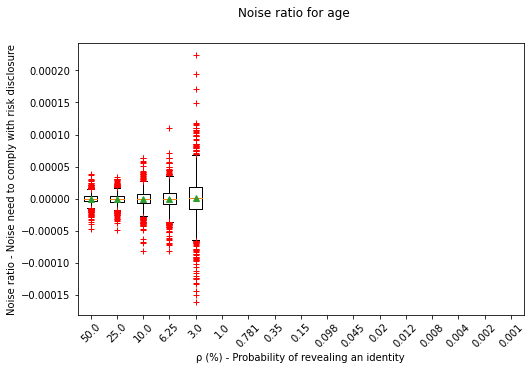

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


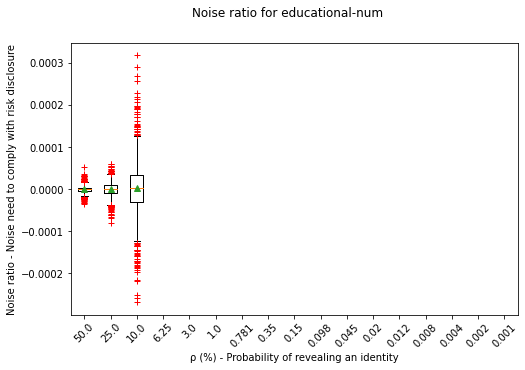

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


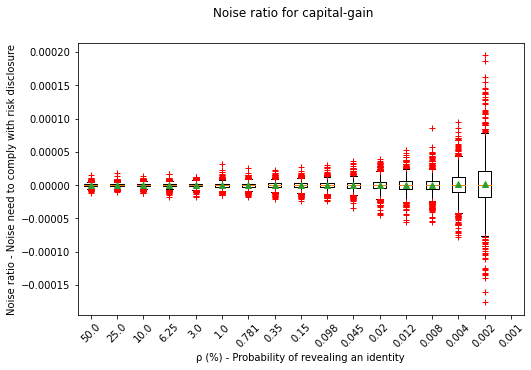

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


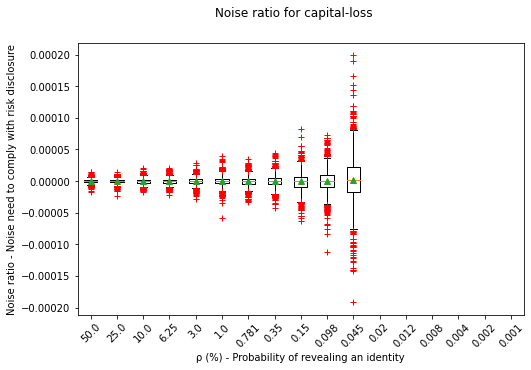

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


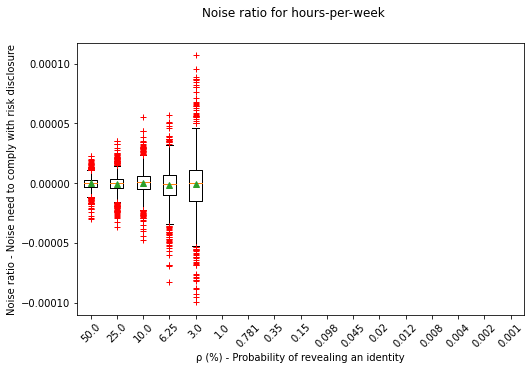

In [38]:
ρ_list = [0.5,0.25,0.1,0.0625,0.03,0.01,0.00781,0.0035,0.0015,0.00098,0.00045, 0.0002, 0.00012, 0.00008, 0.00004, 0.00002, 0.00001]

# For each attribute
for attribute in census_df.columns:
    
    U_range = round(np.abs(np.max(census_df[attribute]) - np.min(census_df[attribute])),4)
    sensitivity_range_mean = round(np.abs(np.max(census_df[attribute]) - np.min(census_df[attribute]))/census_df.shape[0],4)
    m = U_range
    # For each attribute, we will calculate these set of statistic per disclosure risk value
    noise_ratios_attribute = []
    # We calculate for each disclosure risk
    for ρ in ρ_list:
        
        noise_ratios = []
        λ = round(calculate_λ(sensitivity_range_mean, m, ρ), 4)
        # 1000 mean queries
        for i in range(1000):
            
            if λ > 0:
                
                r_unif = random.uniform(0, 1)
                # The inverse of the Laplace CDF, this is a trick to sample from the laplace distribution using uniform noise
                noise = λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
                noise_ratios.append(noise_ratio(noise, U_range))
            else:
                
                noise_ratios.append(np.inf)
        
        noise_ratios_attribute.append(noise_ratios)
           
        
    fig = plt.subplots(figsize =(8, 5))
    # Creating plot
    ρ_list_percent = np.round(np.multiply(ρ_list, 100), 3)
    plt.boxplot(noise_ratios_attribute, labels = ρ_list_percent, manage_ticks=True, showmeans=True, sym='r+')
    plt.tick_params(axis='x', labelrotation=45)
    plt.suptitle('Noise ratio for ' + attribute)
    plt.ylabel('Noise ratio - Noise need to comply with risk disclosure')
    plt.xlabel('ρ (%) - Probability of revealing an identity')
    plt.show()
         

The plots are, in essence, the same as in the paper. Due to the approximation of the x-axis, because there was no clarity in the paper on how to reproduce them, the risk-disclosure values are not exactly the same as in the paper, but you can appreciate the trend and when it stops computing the boxplot (When lambda is less than 0) and therefore there is infinite noise. The triangles represent the mean and the orange line the median. The red crosses the outliers. The whiskers below and above the box give you the lower fence Quantile_1 - 1.5*(Quantile_3 - Quantile_1) and the upper fence Quantile_3+1.5*(Quantile_3-Quantile_1), respectively. The box's ends give you the 25th(Quantile_1) and the 75th(Quantile_3) percentile.   

One may observe that the lower risk disclosure, the larger the spread of the noise ratio.  

The author now plots only two attributes to show how it behaves with the value of ε instead of with ρ.

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


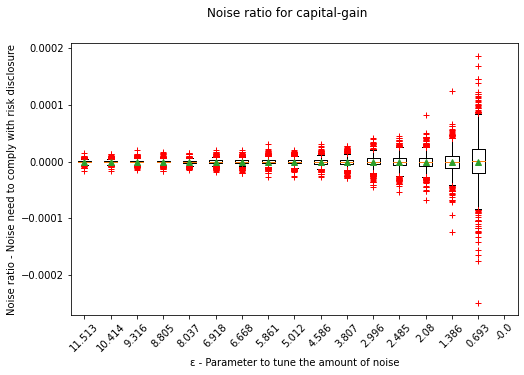

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


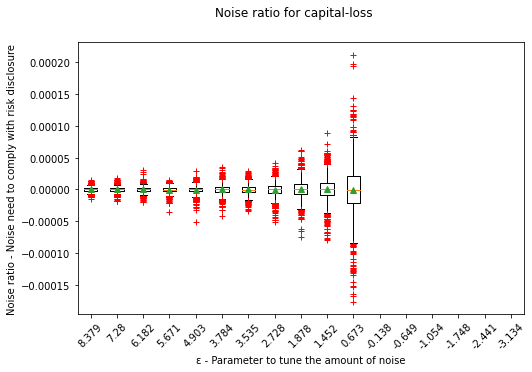

In [39]:
ρ_list = [0.5,0.25,0.1,0.0625,0.03,0.01,0.00781,0.0035,0.0015,0.00098,0.00045, 0.0002, 0.00012, 0.00008, 0.00004, 0.00002, 0.00001]

# For each attribute
for attribute in ["capital-gain","capital-loss"]:
    
    U_range = round(np.abs(np.max(census_df[attribute]) - np.min(census_df[attribute])),4)
    sensitivity_range_mean = round(np.abs(np.max(census_df[attribute]) - np.min(census_df[attribute]))/census_df.shape[0],4)
    m = U_range
    # For each attribute, we will calculate these set of statistic per disclosure risk value
    noise_ratios_attribute = []
    epsilons = []
    # We calculate for each disclosure risk
    for ρ in ρ_list:
        
        noise_ratios = []
        λ = round(calculate_λ(sensitivity_range_mean, m, ρ), 4)
        epsilons.append(calculate_ε_ii(m, ρ))
        # 1000 mean queries
        for i in range(1000):
            
            if λ > 0:
                
                r_unif = random.uniform(0, 1)
                # The inverse of the Laplace CDF, this is a trick to sample from the laplace distribution using uniform noise
                noise = λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
                noise_ratios.append(noise_ratio(noise, U_range))
            else:
                
                noise_ratios.append(np.inf)
        
        noise_ratios_attribute.append(noise_ratios)
           
        
    fig = plt.subplots(figsize =(8, 5))
    # Creating plot
    
    plt.boxplot(noise_ratios_attribute, labels = np.round(epsilons,3), manage_ticks=True, showmeans=True, sym='r+')
    plt.tick_params(axis='x', labelrotation=45)
    plt.suptitle('Noise ratio for ' + attribute)
    plt.ylabel('Noise ratio - Noise need to comply with risk disclosure')
    plt.xlabel('ε - Parameter to tune the amount of noise')
    plt.show()
         

Beautiful, you can see that when epsilons start to become negatove (impossible), the noise should be uniform in an inf range. And again, the lower the epsilon the larger the noise.  
From the paper:  

    Note the similarity of the figures; it is clear that ε-differential privacy and ρ-differential identifiability are comparable in terms of privacy. However, setting ε to achieve this privacy is not an easy problem. While the plots appear similar, the scale of ε is very different across the two plots. Interpretation of the semantics of epsilon with respect to re-identification is very difficult.


Now the author shows how the noise ratio varies depending on the dataset size, 1000 vs. 10000 data points. Because the datasets drawn are random, my results will follow a similar trend but the exact values of the plots might be off. The box plots will not be grouped, so it will not look as fancy. I save the time to study more DP :D  
He does this for the mean and sum query. Because the sensitivity range dimishes O(n) with the dataset size, then there is less noise needed the larger the dataset (The boxplot size for a larger dataset increases in size at a lower rate than the boxplot for a smaller dataset). However, for the sum, the sensitive range is not affected by the dataset size, so the noise required is more is basically the same (The boxplots are of the same size)

#### Mean Query

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


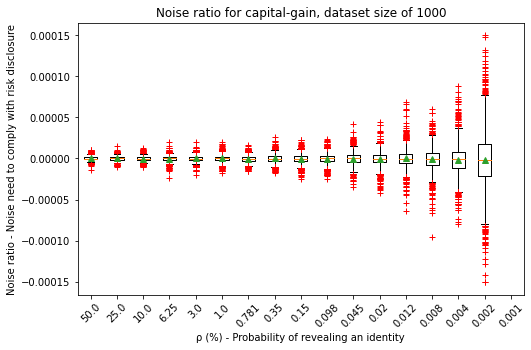

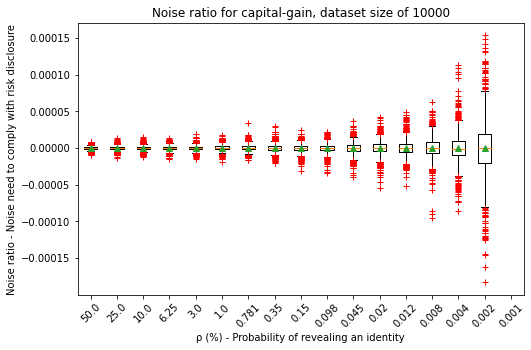

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


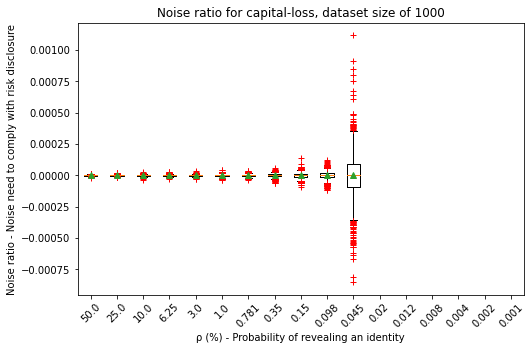

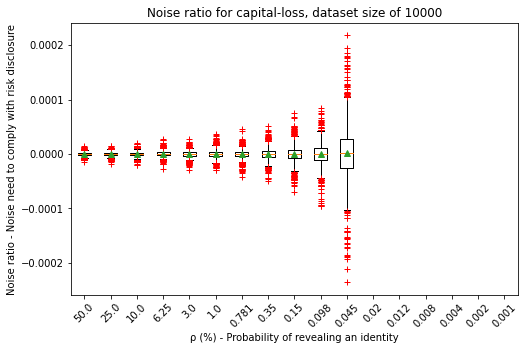

In [40]:
ρ_list = [0.5,0.25,0.1,0.0625,0.03,0.01,0.00781,0.0035,0.0015,0.00098,0.00045, 0.0002, 0.00012, 0.00008, 0.00004, 0.00002, 0.00001]

# For each attribute
for attribute in ["capital-gain","capital-loss"]:
    
    for size in [1000, 10000]:
        
        dataset = census_df[attribute].sample(size)
        U_range = round(np.abs(np.max(dataset) - np.min(dataset)),4)
        sensitivity_range_mean = round(np.abs(np.max(dataset) - np.min(dataset))/census_df.shape[0],4)
        m = U_range
        # For each attribute, we will calculate these set of statistic per disclosure risk value
        noise_ratios_attribute = []
        # We calculate for each disclosure risk
        for ρ in ρ_list:

            noise_ratios = []
            λ = round(calculate_λ(sensitivity_range_mean, m, ρ), 4)
            # 1000 mean queries
            for i in range(1000):

                if λ > 0:

                    r_unif = random.uniform(0, 1)
                    # The inverse of the Laplace CDF, this is a trick to sample from the laplace distribution using uniform noise
                    noise = λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
                    noise_ratios.append(noise_ratio(noise, U_range))
                else:

                    noise_ratios.append(np.inf)

            noise_ratios_attribute.append(noise_ratios)


        fig = plt.subplots(figsize =(8, 5))
        # Creating plot
        ρ_list_percent = np.round(np.multiply(ρ_list, 100), 3)
        plt.boxplot(noise_ratios_attribute, labels = ρ_list_percent, manage_ticks=True, showmeans=True, sym='r+')
        plt.tick_params(axis='x', labelrotation=45)
        plt.ylabel('Noise ratio - Noise need to comply with risk disclosure')
        plt.xlabel('ρ (%) - Probability of revealing an identity')
        plt.title('Noise ratio for ' + attribute + ', dataset size of ' + str(size))

    plt.show()
         

#### Sum query

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


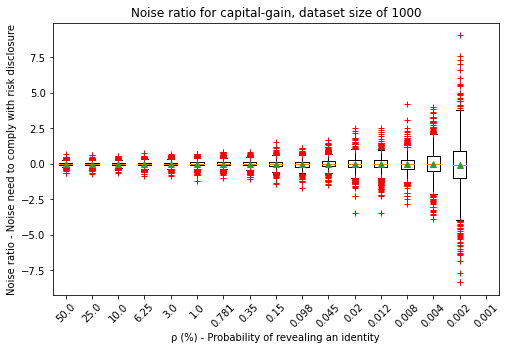

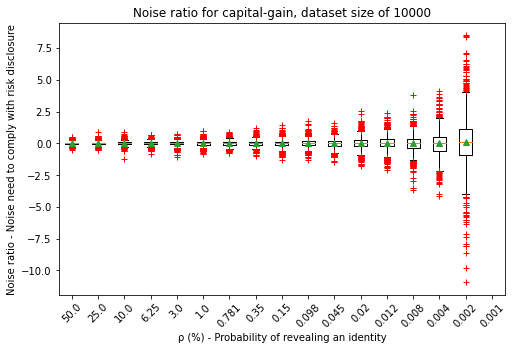

/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/anaconda3/envs/privacy/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


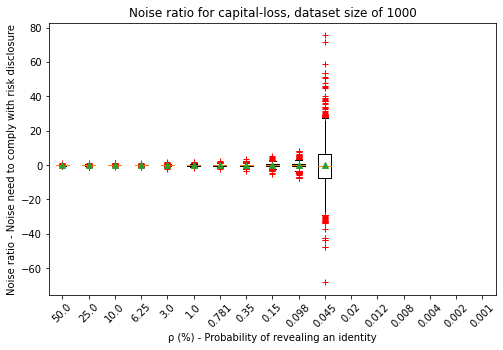

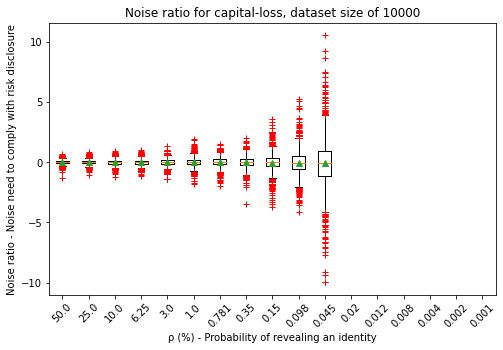

In [41]:
ρ_list = [0.5,0.25,0.1,0.0625,0.03,0.01,0.00781,0.0035,0.0015,0.00098,0.00045, 0.0002, 0.00012, 0.00008, 0.00004, 0.00002, 0.00001]

# For each attribute
for attribute in ["capital-gain","capital-loss"]:
    
    for size in [1000, 10000]:
        
        dataset = census_df[attribute].sample(size)
        U_range = round(np.abs(np.max(dataset) - np.min(dataset)),4)
        sensitivity_range_sum = round(np.abs(np.max(dataset) - np.min(dataset)),4)
        m = U_range
        # For each attribute, we will calculate these set of statistic per disclosure risk value
        noise_ratios_attribute = []
        # We calculate for each disclosure risk
        for ρ in ρ_list:

            noise_ratios = []
            λ = round(calculate_λ(sensitivity_range_sum, m, ρ), 4)
            # 1000 mean queries
            for i in range(1000):

                if λ > 0:

                    r_unif = random.uniform(0, 1)
                    # The inverse of the Laplace CDF, this is a trick to sample from the laplace distribution using uniform noise
                    noise = λ*np.sign(r_unif-0.5)*np.log(1-2*np.abs(r_unif-0.5))
                    noise_ratios.append(noise_ratio(noise, U_range))
                else:

                    noise_ratios.append(np.inf)

            noise_ratios_attribute.append(noise_ratios)


        fig = plt.subplots(figsize =(8, 5))
        # Creating plot
        ρ_list_percent = np.round(np.multiply(ρ_list, 100), 3)
        plt.boxplot(noise_ratios_attribute, labels = ρ_list_percent, manage_ticks=True, showmeans=True, sym='r+')
        plt.tick_params(axis='x', labelrotation=45)
        plt.ylabel('Noise ratio - Noise need to comply with risk disclosure')
        plt.xlabel('ρ (%) - Probability of revealing an identity')
        plt.title('Noise ratio for ' + attribute + ', dataset size of ' + str(size))

    plt.show()
         

## THE END :)